# Proyecto HUOM autor

###  Autor *Ezequiel Eliano Sombory*

#### Consigna: El desafío es crear un script en Python3 que lea el archivo y genera un .csv con las propiedades de-duplicadas y al cual se agrega indicadores sobre cuantas veces una propiedad fue encontrado en cuál portal.

### Importo Librerías

In [89]:
import pandas as pd

### Imporrto el Dataset

In [89]:
df = pd.read_csv('../data/query_result_2021-11-25T16_27_02.44381Z.csv')

In [90]:
df.shape    

(73695, 19)

# Analisis descriptivo

#### 1. Realizo un primera aproximación a los datos analizando: Datos Unicos, Frecuencia y su distribució 

In [88]:
df.describe(include='all')

link              origin  \
count                                               73695               73695   
unique                                              69196                   3   
top     https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
freq                                                   32               51103   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                 scraped_at publication_date publisher  \
count                 73695            73462     73668   
unique                44702            22689      7712   
top     2021-11-22T04:23:41       2021-08-30   Procasa   
freq                     20             1139      3061   
mean                    NaN              NaN       NaN   
std                     NaN              NaN       NaN   
min                     NaN              NaN       NaN   
25%                     NaN              NaN       NaN   
50%                     NaN              NaN       NaN   
75%                     NaN              NaN       NaN   
max                     NaN              NaN       NaN   

                                   publication_title         region  \
count                                          72694          73695   
unique                                         36159              1   
top     Departamento En Venta De 2 Dorm. En Santiago  metropolitana   
freq                                            1020          73695   
mean                                             NaN            NaN   
std                                              NaN            NaN   
min                                              NaN            NaN   
25%                                              NaN            NaN   
50%                                              NaN            NaN   
75%                                              NaN            NaN   
max                                              NaN            NaN   

            latitude     longitude  \
count   70765.000000  70765.000000   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean      -32.697767    -69.071312   
std         4.947516     10.400595   
min       -39.853571   -122.714055   
25%       -33.449161    -70.654295   
50%       -33.440434    -70.641426   
75%       -33.433525    -70.613961   
max        44.690809      0.000000   

                                              description      price_uf  \
count                                               73230  5.976200e+04   
unique                                              47455           NaN   
top     El vendedor no incluyó una descripción del inm...           NaN   
freq                                                  312           NaN   
mean                                                  NaN  2.236816e+04   
std                                                   NaN  1.353618e+06   
min                                                   NaN  0.000000e+00   
25%                                                   NaN  2.539500e+03   
50%                                                   NaN  3.550000e+03   
75%                                                   NaN  6.780000e+03   
max                                                   NaN  2.000000e+08   

        is_apartment   local_price   commune  superficie_total_m2  \
count    73695.00000  6.462700e+04     73695         73695.000000   
unique           NaN           NaN

#### 2. Adicionalmente realizo una análisis de negocio para comprender qué varibles son plausible de elegir y cuáles no para no repetir "Propiedades"

In [89]:
df.head()

link              origin  \
0  https://www.portalinmobiliario.com/MLC-6007545...  PortalInmobiliario   
1  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
2  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
3  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
4  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   

            scraped_at publication_date  \
0  2021-04-29T06:29:13       2021-04-05   
1  2021-07-02T04:14:46       2020-12-18   
2  2021-11-08T04:42:13       2021-01-04   
3  2021-05-10T04:43:32       2021-03-15   
4  2021-05-08T04:47:52       2021-04-10   

                                    publisher  \
0                Assetplanasesoresdeinversion   
1                         Santiago Corredores   
2                    Avf Gestión Inmobiliaria   
3  Grupo Del Solar Planificación Inmobiliaria   
4             Gestión Inmobiliaria Nuñez Ltda   

                                   publication_title         region  \
0                                                NaN  metropolitana   
1                    Avenida Manuel Antonio Matta 52  metropolitana   
2  Sta. Isabel / Carmen / Victoria / Metro Sta. I...  metropolitana   
3                                        Metro Ñuble  metropolitana   
4         Metro Parque Almagro / Universidad Central  metropolitana   

    latitude  longitude                                        description  \
0        NaN        NaN  EXCLUSIVO PARA INVERSIONISTAS     - Ascensores...   
1 -33.455891 -70.630577  Departamento Home Estudio (1 ambiente) cocina ...   
2 -33.448254 -70.639923  Vende en Exclusiva AVF Gestión Inmobiliaria.  ...   
3        NaN        NaN  A pasos de Metro Ñuble Extraordinario Departam...   
4        NaN        NaN  IDEAL INVERSIONISTAS!!!! MODELO MARIPOSA Moder...   

   price_uf  is_apartment  local_price   commune  superficie_total_m2  \
0    2500.0             1   73715734.0  santiago                 43.0   
1    2050.0             1   60911234.0  santiago                 24.0   
2    2050.0             1   62472079.0  santiago                 35.0   
3       NaN             1   70000000.0  santiago                 50.0   
4    4200.0             1  123990779.0  santiago                 60.0   

   superficie_util_m2  bedrooms  bathrooms  parking  
0                43.0         2          1      NaN  
1                21.0         1          1      NaN  
2                35.0         1          1      NaN  
3                45.0         2          1      NaN  
4                55.0         2          2      1.0

#### 3. Revisamos las principales variables y su frecuencia: Origen, Publisher y otras Variables de la Propiedad ("Lista") 

In [2]:
# Creo una lista de propiedades
lista = ['region', 
       'price_uf', 'is_apartment', 'local_price', 'commune',
       'superficie_total_m2', 'superficie_util_m2', 'bedrooms', 'bathrooms',
       'parking']

In [4]:
print("Origenes distintos: ", df['origin'].unique())
print(("Cantidad de portales diferentes: ", len(df['publisher'].unique())))

Origenes distintos:  ['PortalInmobiliario' 'GoPlaceIt_CL' 'Yapo']
('Cantidad de portales diferentes: ', 7713)


In [6]:
# Cantidad de registros segun origen
df.groupby('origin').count()

link  scraped_at  publication_date  publisher  \
origin                                                               
GoPlaceIt_CL        11573       11573             11573      11570   
PortalInmobiliario  51103       51103             50870      51079   
Yapo                11019       11019             11019      11019   

                    publication_title  region  latitude  longitude  \
origin                                                               
GoPlaceIt_CL                    11573   11573     11573      11573   
PortalInmobiliario              50102   51103     48173      48173   
Yapo                            11019   11019     11019      11019   

                    description  price_uf  is_apartment  local_price  commune  \
origin                                                                          
GoPlaceIt_CL              11114      9068         11573         2505    11573   
PortalInmobiliario        51097     39675         51103        51103    51103   
Yapo                      11019     11019         11019        11019    11019   

                    superficie_total_m2  superficie_util_m2  bedrooms  \
origin                                                                  
GoPlaceIt_CL                      11573               11573     11573   
PortalInmobiliario                51103               51103     51103   
Yapo                              11019               11019     11019   

                    bathrooms  parking  
origin                                  
GoPlaceIt_CL            11573    10344  
PortalInmobiliario      51103    22541  
Yapo                    11019     1318

In [102]:
#cantidad de registros segun publicador
df.groupby('publisher').count()

link  origin  scraped_at  publication_date  \
publisher                                                            
1% Brokers                 7       7           7                 7   
1%Brokers                  5       5           5                 5   
1pro_piedades              2       2           2                 2   
247 Urbano                21      21          21                21   
247urbano                 46      46          46                46   
...                      ...     ...         ...               ...   
Áurea Propiedades          2       2           2                 2   
Ávila Inversiones          1       1           1                 1   
Índigo Propiedades         1       1           1                 1   
Óscar Carles               2       2           2                 2   
ángel bustamante reyes     1       1           1                 1   

                        publication_title  region  latitude  longitude  \
publisher                                                                
1% Brokers                              7       7         7          7   
1%Brokers                               5       5         5          5   
1pro_piedades                           2       2         2          2   
247 Urbano                             21      21        21         21   
247urbano                              46      46        44         44   
...                                   ...     ...       ...        ...   
Áurea Propiedades                       2       2         2          2   
Ávila Inversiones                       1       1         1          1   
Índigo Propiedades                      1       1         1          1   
Óscar Carles                            2       2         2          2   
ángel bustamante reyes                  1       1         1          1   

                        description  price_uf  is_apartment  local_price  \
publisher                                                                  
1% Brokers                        7         7             7            7   
1%Brokers                         5         5             5            0   
1pro_piedades                     2         2             2            2   
247 Urbano                       21        16            21            5   
247urbano                        46        34            46           46   
...                             ...       ...           ...          ...   
Áurea Propiedades                 2         2             2            2   
Ávila Inversiones                 1         0             1            1   
Índigo Propiedades                1         1             1            1   
Óscar Carles                      2         2             2            0   
ángel bustamante reyes            1         1             1            1   

                        commune  superficie_total_m2  superficie_util_m2  \
publisher                                                                  
1% Brokers                    7                    7                   7   
1%Brokers                     5                    5                   5   
1pro_piedades                 2                    2                   2   
247 Urbano                   21                   21                  21   
247urbano                    46                   46                  46   
...                         ...                  ...                 ...   
Áurea Propiedades             2                    2                   2   
Ávila Inversiones             1                    1                   1   
Índigo Propiedades            1                    1                   1   
Óscar Carles                  2                    2                   2   
ángel bustamante reyes        1                    1                   1   

                        bedrooms  bathrooms  parking  
publisher                                             
1% Brokers                     7          7        7  
1%Broke

In [103]:
# Agrupación de registros por lista de columnas de interés
df.groupby(lista).count()

link  \
region        price_uf   is_apartment local_price commune     superficie_total_m2 superficie_util_m2 bedrooms bathrooms parking         
metropolitana 3.00       1            91694.0     Santiago    55.00               52.00              2        2         1.0         1   
              15.22      1            450000.0    Providencia 45.00               41.00              1        1         1.0         1   
              33.00      0            1005648.0   santiago    873.00              268.00             9        3         3.0         1   
              53.00      1            159172.0    providencia 60.00               70.00              2        1         1.0         1   
                                      1602134.0   santiago    50.00               52.00              2        2         1.0         1   
...                                                                                                                               ...   
              845512.00  0            255589271.0 santiago    353.00              133.00             5        1         4.0         1   
              875918.00  0            261332021.0 santiago    307.00              164.00             4        2         1.0         1   
              1220594.00 1            374197918.0 providencia 155.19              121.71             3        3         1.0         1   
              1632142.00 0            483939314.0 providencia 296.00              176.00             3        4         2.0         1   
              2096325.00 0            642671069.0 providencia 600.00              250.00             4        4         2.0         1   

                                                                                                                                 origin  \
region        price_uf   is_apartment local_price commune     superficie_total_m2 superficie_util_m2 bedrooms bathrooms parking           
metropolitana 3.00       1            91694.0     Santiago    55.00               52.00              2        2         1.0           1   
              15.22      1            450000.0    Providencia 45.00               41.00              1        1         1.0           1   
              33.00      0            1005648.0   santiago    873.00              268.00             9        3         3.0           1   
              53.00      1            159172.0    providencia 60.00               70.00              2        1         1.0           1   
                                      1602134.0   santiago    50.00               52.00              2        2         1.0           1   
...                                                                                                                                 ...   
              845512.00  0            255589271.0 santiago    353.00              133.00             5        1         4.0           1   
              875918.00  0            261332021.0 santiago    307.00              164.00             4        2         1.0           1   
              1220594.00 1            374197918.0 providencia 155.19              121.71             3        3         1.0           1   
              1632142.00 0            483939314.0 providencia 296.00              176.00             3        4         2.0           1   
              2096325.00 0            642671069.0 providencia 600.00              250.00             4        4         2.0           1   

                                                                                                                                 scraped_at  \
region        price_uf   is_apartment local_price commune     superficie_total_m2 superficie_util_m2 bedrooms bathrooms parking               
metropolitana 3.00       1            91694.0     Santiago    55.00               52.00              2        2         1.0               1   
              15.22      1            450000.0    Providencia 45.00               41.00              1        

In [107]:
#### Elimino las columnas que no tienen latitud y longitud

In [107]:
df1 = df[df['latitude'] != 0]
df1.head()

link              origin  \
0  https://www.portalinmobiliario.com/MLC-6007545...  PortalInmobiliario   
1  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
2  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
3  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
4  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   

            scraped_at publication_date  \
0  2021-04-29T06:29:13       2021-04-05   
1  2021-07-02T04:14:46       2020-12-18   
2  2021-11-08T04:42:13       2021-01-04   
3  2021-05-10T04:43:32       2021-03-15   
4  2021-05-08T04:47:52       2021-04-10   

                                    publisher  \
0                Assetplanasesoresdeinversion   
1                         Santiago Corredores   
2                    Avf Gestión Inmobiliaria   
3  Grupo Del Solar Planificación Inmobiliaria   
4             Gestión Inmobiliaria Nuñez Ltda   

                                   publication_title         region  \
0                                                NaN  metropolitana   
1                    Avenida Manuel Antonio Matta 52  metropolitana   
2  Sta. Isabel / Carmen / Victoria / Metro Sta. I...  metropolitana   
3                                        Metro Ñuble  metropolitana   
4         Metro Parque Almagro / Universidad Central  metropolitana   

    latitude  longitude                                        description  \
0        NaN        NaN  EXCLUSIVO PARA INVERSIONISTAS     - Ascensores...   
1 -33.455891 -70.630577  Departamento Home Estudio (1 ambiente) cocina ...   
2 -33.448254 -70.639923  Vende en Exclusiva AVF Gestión Inmobiliaria.  ...   
3        NaN        NaN  A pasos de Metro Ñuble Extraordinario Departam...   
4        NaN        NaN  IDEAL INVERSIONISTAS!!!! MODELO MARIPOSA Moder...   

   price_uf  is_apartment  local_price   commune  superficie_total_m2  \
0    2500.0             1   73715734.0  santiago                 43.0   
1    2050.0             1   60911234.0  santiago                 24.0   
2    2050.0             1   62472079.0  santiago                 35.0   
3       NaN             1   70000000.0  santiago                 50.0   
4    4200.0             1  123990779.0  santiago                 60.0   

   superficie_util_m2  bedrooms  bathrooms  parking  
0                43.0         2          1      NaN  
1                21.0         1          1      NaN  
2                35.0         1          1      NaN  
3                45.0         2          1      NaN  
4                55.0         2          2      1.0

#### Comparamos Dataframe con y sin datos de lactitud, para obervar cuanto no contienen info. Se observa que tan solo tenemos mas de Mil casos sin info.

In [4]:
print(df.shape)
df1 = df[df['latitude'] != 0]
df1.shape

(73695, 19)


(72127, 19)

In [109]:
df['region'].unique()

array(['metropolitana'], dtype=object)

# Conclusión

#### En base al analisis anterior, genero d3. Con las principales variables "internas" de la propiedades (Lac,Long,Mt2,Parking,etc.) y analizamos casos testigos para determinar si este conjunto de variables permite "INDIVIDUALIZAR" las propiedades

In [5]:
print(df1.groupby(['latitude', 'longitude', 'superficie_total_m2', 'superficie_util_m2','parking']).last())
df3 = df1.groupby(['latitude', 'longitude', 'superficie_total_m2', 'superficie_util_m2','parking']).last()

                                                                                                                   link  \
latitude   longitude  superficie_total_m2 superficie_util_m2 parking                                                      
-33.629758 -70.629374 42.0                43.0               1.0      https://www.yapo.cl/region_metropolitana/compr...   
                      44.0                42.0               1.0      https://www.yapo.cl/region_metropolitana/compr...   
-33.628075 -70.590932 64.0                64.0               1.0      https://www.yapo.cl/region_metropolitana/compr...   
-33.620505 -70.590098 73.0                73.0               1.0      https://www.yapo.cl/region_metropolitana/compr...   
-33.618317 -70.575915 36.0                36.0               10.0     https://www.yapo.cl/region_metropolitana/compr...   
...                                                                                                                 ...   
-33.207091 -70.6

In [25]:
df1.groupby(['latitude', 'longitude'])[['link', 'origin', 'scraped_at', 'publication_date', 'publisher',
       'publication_title', 'region', 'description',
       'price_uf', 'is_apartment', 'local_price', 'commune',
       'superficie_total_m2', 'superficie_util_m2', 'bedrooms', 'bathrooms',
       'parking']].last()

link  \
latitude   longitude                                                        
-39.853571 -73.209455   https://www.portalinmobiliario.com/venta/casa/...   
-36.599340 -72.116337   https://www.portalinmobiliario.com/venta/casa/...   
-36.131947 -71.815449   https://www.portalinmobiliario.com/venta/casa/...   
-34.885801 -56.100777   https://www.yapo.cl/region_metropolitana/compr...   
-34.176875 -70.695253   https://www.portalinmobiliario.com/venta/casa/...   
...                                                                   ...   
-22.478290 -68.929071   https://www.yapo.cl/region_metropolitana/compr...   
-20.202879 -69.287750   https://www.portalinmobiliario.com/venta/depar...   
 38.440429 -122.714055  https://www.yapo.cl/region_metropolitana/compr...   
 44.690564 -75.499357   https://www.yapo.cl/region_metropolitana/compr...   
 44.690809 -75.499116   https://www.yapo.cl/region_metropolitana/compr...   

                                    origin           scraped_at  \
latitude   longitude                                              
-39.853571 -73.209455   PortalInmobiliario  2021-11-08T05:20:48   
-36.599340 -72.116337   PortalInmobiliario  2021-11-01T05:01:07   
-36.131947 -71.815449   PortalInmobiliario  2021-10-14T05:06:01   
-34.885801 -56.100777                 Yapo  2021-08-02T02:59:13   
-34.176875 -70.695253   PortalInmobiliario  2021-11-22T05:05:42   
...                                    ...                  ...   
-22.478290 -68.929071                 Yapo  2021-08-05T02:53:40   
-20.202879 -69.287750   PortalInmobiliario  2021-11-08T04:44:29   
 38.440429 -122.714055                Yapo  2021-11-22T00:57:15   
 44.690564 -75.499357                 Yapo  2021-08-05T03:07:25   
 44.690809 -75.499116                 Yapo  2021-05-10T03:35:43   

                           publication_date                    publisher  \
latitude   longitude                                                       
-39.853571 -73.209455                  None         Inmobiliaria Baluart   
-36.599340 -72.116337                  None                       Convet   
-36.131947 -71.815449                  None           Inmobiliaria Malpo   
-34.885801 -56.100777   2021-07-03T15:08:14     Coproch-Gabriela Canales   
-34.176875 -70.695253                  None              Inmobiliaria Py   
...                                     ...                          ...   
-22.478290 -68.929071   2021-05-30T19:17:02                   Me Encargo   
-20.202879 -69.287750            2021-09-13  Corredora M & C Propiedades   
 38.440429 -122.714055  2021-10-13T16:32:52    Home Gestion Inmobiliaria   
 44.690564 -75.499357   2021-08-02T17:51:16                   David Soto   
 44.690809 -75.499116   2021-03-31T12:14:00              Corredor Aliado   

                                                        publication_title  \
latitude   longitude                                                        
-39.853571 -73.209455                                        Reina Isabel   
-36.599340 -72.116337                          Convet Barrio Las Pataguas   
-36.131947 -71.815449                                        San Pedro IV   
-34.885801 -56.100777                            Departamento Providencia   
-34.176875 -70.695253                           El Remanso de Machalí III   
...                                                                   ...   
-22.478290 -68.929071   Departamento Venta Departamento en Estacion&#8...   
-20.202879 -69.287750                    Vende Exclusivo M&c Propiedades!   
 38.440429 -122.714055    DEPARTAMENTO Cercano Metro Santa Lucia Santiago   
 44.690564 -75.499357                Sector Ricardo Lyon - Carlos Antúnez   
 44.690809 -75.499116                Sector Ricardo Lyon - Carlos Antúnez   

                               region  \
latitude   longitude                    
-39.853571 -73.209455   metropolitana   
-36.599340 -72.116337   metropolitana   
-36.131947 -71.815449   metropolitana   

### Finalmente elaboro la lista de las variables mas relevantes y explicativas para individualizar la lista

In [95]:
# Lista de valores para aplicar criterio de unicos
lista = ['latitude', 'longitude', 'superficie_total_m2', 'superficie_util_m2','parking']
# lista = ['region', 
#        'price_uf', 'is_apartment', 'local_price', 'commune',
#        'superficie_total_m2', 'superficie_util_m2', 'bedrooms', 'bathrooms',
#        'parking']

## Summary 

## Se observa que existen 23786 valores unicas, sobre un total de 73695 registros, con 36715 valores duplicados

(23786, 19)
Cantidad de registros:  73695
Cantidad de valores duplicados 36715
Cantidad de valores unicos 23786


<AxesSubplot:title={'center':'Qty Duplicated values'}>

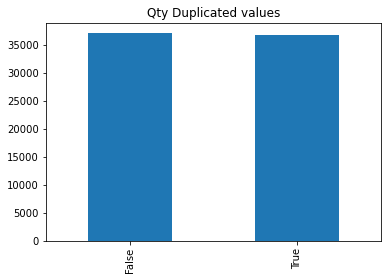

In [96]:
df_dup = df[lista].duplicated(keep=False)
df_final = df[~df_dup]
print(df_final.shape)
print("Cantidad de registros: ", len(df['link']))
print("Cantidad de valores duplicados",df[lista].duplicated().sum())
print("Cantidad de valores unicos",len(df_final['region']))
df[lista].duplicated().value_counts().plot(kind='bar', title='Qty Duplicated values')

In [97]:
df['isduplicate'] = df[lista].duplicated()
df.head()

link              origin  \
0  https://www.portalinmobiliario.com/MLC-6007545...  PortalInmobiliario   
1  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
2  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
3  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   
4  https://www.portalinmobiliario.com/venta/depar...  PortalInmobiliario   

            scraped_at publication_date  \
0  2021-04-29T06:29:13       2021-04-05   
1  2021-07-02T04:14:46       2020-12-18   
2  2021-11-08T04:42:13       2021-01-04   
3  2021-05-10T04:43:32       2021-03-15   
4  2021-05-08T04:47:52       2021-04-10   

                                    publisher  \
0                Assetplanasesoresdeinversion   
1                         Santiago Corredores   
2                    Avf Gestión Inmobiliaria   
3  Grupo Del Solar Planificación Inmobiliaria   
4             Gestión Inmobiliaria Nuñez Ltda   

                                   publication_title         region  \
0                                                NaN  metropolitana   
1                    Avenida Manuel Antonio Matta 52  metropolitana   
2  Sta. Isabel / Carmen / Victoria / Metro Sta. I...  metropolitana   
3                                        Metro Ñuble  metropolitana   
4         Metro Parque Almagro / Universidad Central  metropolitana   

    latitude  longitude                                        description  \
0        NaN        NaN  EXCLUSIVO PARA INVERSIONISTAS     - Ascensores...   
1 -33.455891 -70.630577  Departamento Home Estudio (1 ambiente) cocina ...   
2 -33.448254 -70.639923  Vende en Exclusiva AVF Gestión Inmobiliaria.  ...   
3        NaN        NaN  A pasos de Metro Ñuble Extraordinario Departam...   
4        NaN        NaN  IDEAL INVERSIONISTAS!!!! MODELO MARIPOSA Moder...   

   price_uf  is_apartment  local_price   commune  superficie_total_m2  \
0    2500.0             1   73715734.0  santiago                 43.0   
1    2050.0             1   60911234.0  santiago                 24.0   
2    2050.0             1   62472079.0  santiago                 35.0   
3       NaN             1   70000000.0  santiago                 50.0   
4    4200.0             1  123990779.0  santiago                 60.0   

   superficie_util_m2  bedrooms  bathrooms  parking  isduplicate  
0                43.0         2          1      NaN        False  
1                21.0         1          1      NaN        False  
2                35.0         1          1      NaN        False  
3                45.0         2          1      NaN        False  
4                55.0         2          2      1.0        False

In [98]:
df['cant_duplicates'] = 0
#iterate over the rows of the dataframe and count the number of isduplicated true
for index, row in df.iterrows():
    if row['isduplicate'] == True:
        df.loc[index, 'cant_duplicates'] =  int(df.loc[index, 'cant_duplicates'])+1


## Creo el CSV con la lista de propiedades

In [99]:
df.to_csv('../data/query_result_2021-11-25T16_27_02.44381Z_filtered.csv', index=False)

In [103]:
lista = ['origin']
propiedades = ['price_uf', 'is_apartment', 'local_price', 'commune','superficie_total_m2', 'superficie_util_m2', 'bedrooms', 'bathrooms',]

In [104]:
df2 = df.groupby(lista)[propiedades].count()
# df2.reset_index(level=0, inplace=True)
# df2.reset_index(level=0, inplace=True)
# df2.reset_index(level=0, inplace=True)
# df2.reset_index(level=0, inplace=True)
# df2.reset_index(level=0, inplace=True)
df2

price_uf  is_apartment  local_price  commune  \
origin                                                             
GoPlaceIt_CL            9068         11573         2505    11573   
PortalInmobiliario     39675         51103        51103    51103   
Yapo                   11019         11019        11019    11019   

                    superficie_total_m2  superficie_util_m2  bedrooms  \
origin                                                                  
GoPlaceIt_CL                      11573               11573     11573   
PortalInmobiliario                51103               51103     51103   
Yapo                              11019               11019     11019   

                    bathrooms  
origin                         
GoPlaceIt_CL            11573  
PortalInmobiliario      51103  
Yapo                    11019

<AxesSubplot:title={'center':'Qty Duplicated values'}, ylabel='Frequency'>

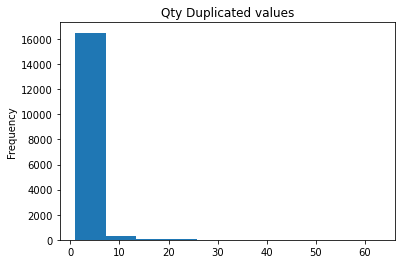

In [88]:
df2['cant_duplicates'].plot(kind='hist', title='Qty Duplicated values')

## Data Discovery de la nueva base, mediante *"pandas_profiling"*

In [85]:
df2.to_csv('../data/propiedades_duplicadas.csv', index=False)

In [106]:
_ = !pip install pandas_profiling
import pandas_profiling

In [107]:
df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]
